In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
import tqdm
import pandas as pd 

In [2]:
class GaussArm():
  def __init__(self, mu, sigma):
    self.mu = mu
    self.sigma = sigma
  
  def draw(self):
    return random.gauss(self.mu, self.sigma)

In [18]:
# alpha -1/2, 0, 1/2
from scipy import stats
import numpy as np 
class GaussSampling():
    def __init__(self, counts, values, double_rewards, alpha):
        self.counts = counts
        self.values = values
        self.double_rewards = double_rewards
        self.alpha = alpha
    
    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.double_rewards = np.zeros(n_arms)
        
    def select_arm(self):
        theta = [(arm, 
                  np.random.standard_t(self.counts[arm] + 2*self.alpha - 1)
                 * np.sqrt((self.double_rewards[arm]- self.counts[arm]*(self.values[arm]**2))/
                              (self.counts[arm]*(self.counts[arm] + 2*self.alpha -1)))
                 + self.values[arm]) 
                 for arm in range(n_arms)]
        theta = sorted(theta, key=lambda x :x[1])
        return theta[-1][0]
    
    def update(self, chosen_arm, reward):
        #引かれた回数を更新
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        #報酬の平均値を更新
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = (n-1)/float(n) * value + (1/float(n)) * reward
        self.values[chosen_arm] = new_value
        #報酬の二乗和を更新
        self.double_rewards[chosen_arm] += reward **2

In [20]:
def test_algorithm(algo, n_arms, num_sims, horizon):
    chosen_arms = np.zeros(num_sims * horizon)
    rewards_history = np.zeros(num_sims * horizon)
    regret_history = np.zeros(num_sims * horizon)
    #cumulative_rewards = np.zeros(num_sims * horizon)
    times = np.zeros(num_sims * horizon)
    for sim in (range(num_sims)):
        algo.initialize(n_arms)
        for n in range(int(max(2, 3-2*alpha))):
            for chosen_arm in range(n_arms):
                reward = gauss_arms[chosen_arm].draw()
                algo.update(chosen_arm, reward)
            
        for t in range(horizon):
                index = sim * horizon + t
                times[index] = t + 1
                #アームを決定
                chosen_arm = algo.select_arm()
                chosen_arms[index] = chosen_arm
                #アームを引く　rewardを処理
                reward = gauss_arms[chosen_arm].draw()
                rewards_history[index] = reward
                #regretの計算
                if chosen_arm == 0:
                    regret = 0 
                    regret_history[index] = regret
                else:
                    regret = gauss_arms[0].draw()-reward
                    regret_history[index] = regret
                    
                algo.update(chosen_arm, reward)
    return [times, chosen_arms, rewards_history, regret_history]

In [27]:
#初期値
random.seed(2017)
sim_num = 1000
time = 10000 
alpha_list = [-1/2, 0, 1/2]
n_arms = 2
gauss_mean = [1.0, 0.0]
gauss_sigma = [3.0, 0.3]
#アームを作成
gauss_arms = pd.Series(map(lambda x,y: GaussArm(x,y), gauss_mean, gauss_sigma))

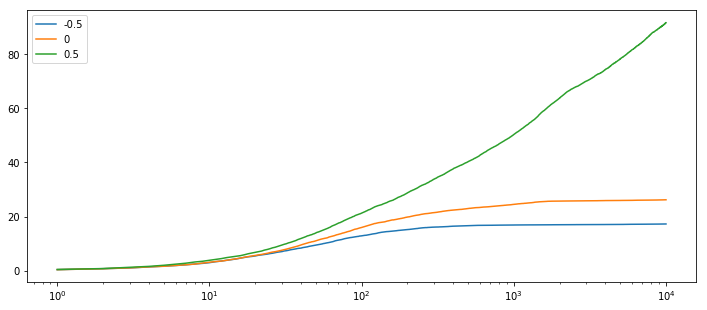

In [28]:
#計算開始
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

for alpha in alpha_list:
    gauss_sampling = GaussSampling([], [], [], alpha) #algorithm(alpha)を作成
    gauss_sampling.initialize(n_arms)
    result = test_algorithm(gauss_sampling, n_arms, sim_num, time)
    df_result = pd.DataFrame({'times':result[0], 
                              "chosen_arms":result[1],
                              "rewards_history":result[2],
                              'regret_history':result[3]})
    regret_grouped = df_result['regret_history'].groupby(df_result['times'])
    df_regret = np.cumsum(regret_grouped.mean())
    ax.set_xscale('log')
    ax.plot(df_regret, label=alpha)

plt.legend()
plt.show()
    


In [15]:
test = [1,2,3]
test[1] += 100 

In [16]:
test

[1, 102, 3]